# Task
Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.



Here is all the data you need:
"advertising.csv"

In [1]:
import pandas as pd

try:
    df_adv = pd.read_csv('advertising.csv')
    display(df_adv.head())
except FileNotFoundError:
    print("Error: 'advertising.csv' not found. Please ensure the file exists in the current directory.")
    df_adv = None

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data exploration

### Subtask:
Explore the loaded advertising dataset (`df_adv`) to understand its characteristics.


In [2]:
# Data Shape and Info
print("Shape of the DataFrame:", df_adv.shape)
print("\nInfo:")
print(df_adv.info())

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df_adv.describe())

# Missing Value Check (Explicit)
print("\nMissing Values per column:")
print(df_adv.isnull().sum())

# Initial Correlation Check
print("\nCorrelation between 'TV' and 'Sales':")
print(df_adv[['TV', 'Sales']].corr())

Shape of the DataFrame: (200, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Descriptive Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Missing Values per column:
TV           0
Radio        0
Ne

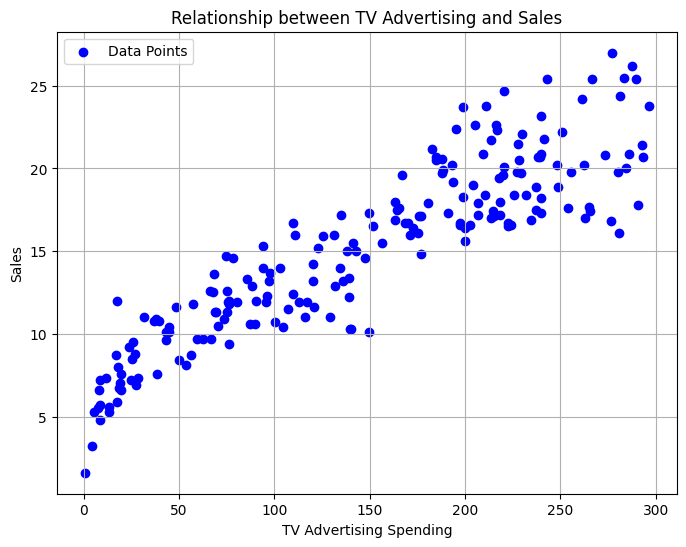

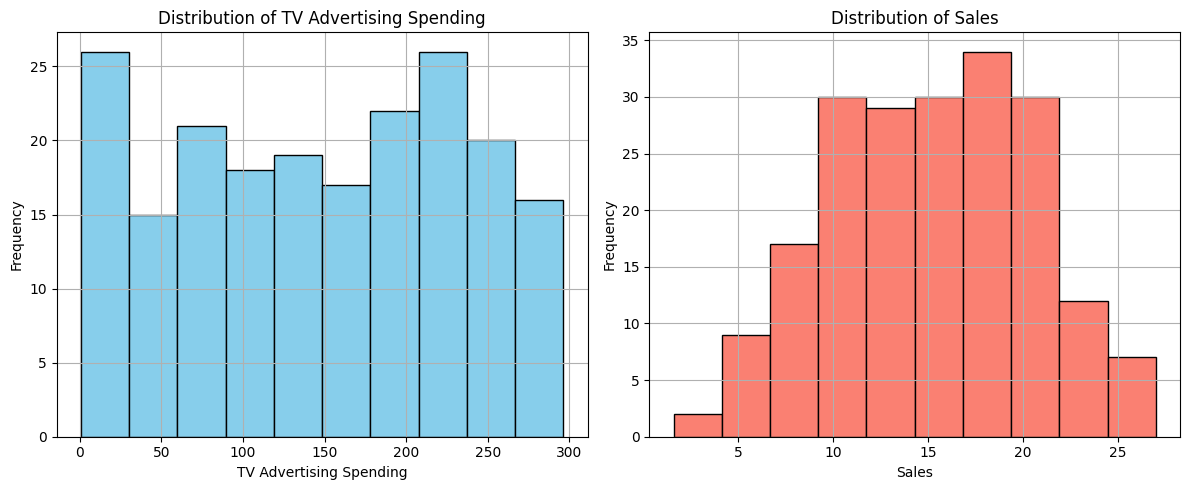

In [3]:
import matplotlib.pyplot as plt

# Scatter plot of TV vs Sales
plt.figure(figsize=(8, 6))
plt.scatter(df_adv['TV'], df_adv['Sales'], color='blue', label='Data Points')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Sales')
plt.title('Relationship between TV Advertising and Sales')
plt.legend()
plt.grid(True)
plt.show()


# Histograms of TV and Sales
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_adv['TV'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Frequency')
plt.title('Distribution of TV Advertising Spending')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df_adv['Sales'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.grid(True)

plt.tight_layout()
plt.show()

## Data visualization




**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df_adv[['TV']]
y = df_adv['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

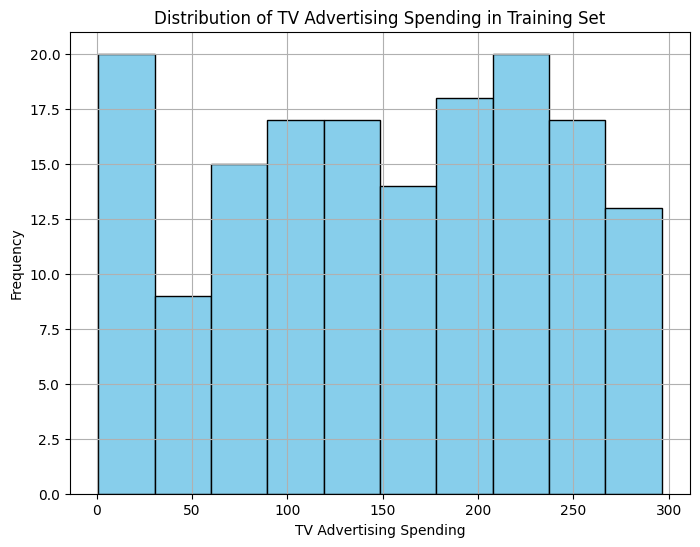

In [5]:
import matplotlib.pyplot as plt

# Histogram of TV advertising spending
plt.figure(figsize=(8, 6))
plt.hist(X_train['TV'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('TV Advertising Spending')
plt.ylabel('Frequency')
plt.title('Distribution of TV Advertising Spending in Training Set')
plt.grid(True)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the linear regression model to the training data
model.fit(X_train, y_train)

LinearRegression()

R-squared: 0.802561303423698
Mean Squared Error: 6.101072906773963
Root Mean Squared Error: 2.470035001123256


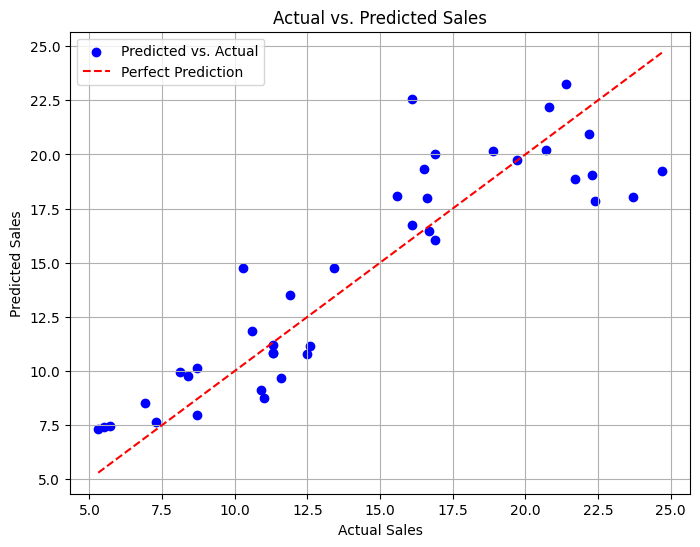

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()